In [194]:
import pandas as pd
import numpy as np

from gensim.models import KeyedVectors

In [195]:
word_vectors = KeyedVectors.load_word2vec_format('trmodel_truncated', binary=True)

In [229]:
# test
word_vectors.get_vector('test')

array([ 3.6752343 ,  3.5727208 ,  0.58854115,  1.3014932 ,  0.9988798 ,
        1.875416  , -1.5055971 ,  6.556562  ,  0.84857816,  3.963331  ,
        2.3502285 ,  2.2571442 ,  4.4195943 , -2.155676  ,  0.64765775,
       -2.1940875 ,  2.7437816 ,  3.50094   , -0.25286156, -0.43737125,
        0.3856713 ,  1.7983892 ,  0.17250548,  2.685323  ,  0.08131203,
        2.6644003 ,  2.7006814 ,  0.13602364,  2.293689  ,  0.7282618 ,
        1.8219929 ,  3.7741597 ,  5.828385  ,  0.15540688,  4.793951  ,
        0.5971337 ,  1.5521104 ,  1.7742623 , -0.2929796 , -0.70113754],
      dtype=float32)

In [197]:
def cosine_similarity(vec1, vec2):
    if vec1 is None or vec2 is None:
        return 0.0
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

In [198]:
# test
w = word_vectors.get_vector('test')
y = word_vectors.get_vector('testi')

cs = cosine_similarity(w,y)
cs

0.7878671

In [199]:
def root_dict(word):
    l = len(word)
    word_vec = word_vectors.get_vector(word)
    dict = {}
    for _ in range(l):
        try:
            pred_vec = word_vectors.get_vector(word)
        except Exception as e:
            pred_vec = None
        
        cs = cosine_similarity(word_vec, pred_vec)
        dict[word] = cs
        
        word = word[:-1]
        
    return dict 

In [200]:
import matplotlib.pyplot as plt

def root_plot(data):
    keys = list(data.keys())
    values = list(data.values())

    plt.plot(keys, values, 'bo-')
    plt.xticks(rotation=45)

    for i, value in enumerate(values):
        if value != 0:
            plt.text(keys[i], value, f'{value:.10f}', ha='center', va='bottom', rotation=30)

    plt.show()

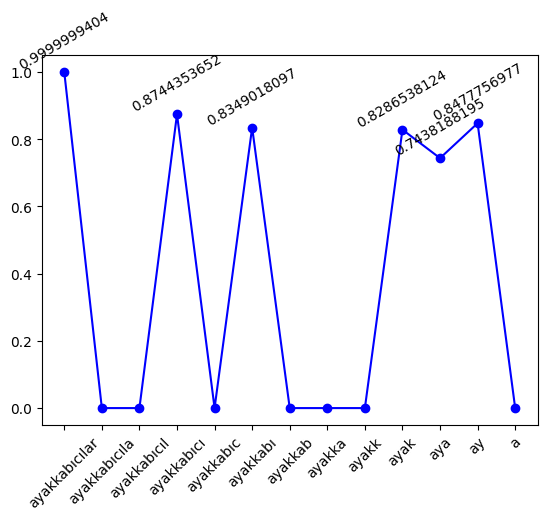

In [201]:
# test
test = root_dict('ayakkabıcılar')
root_plot(test)

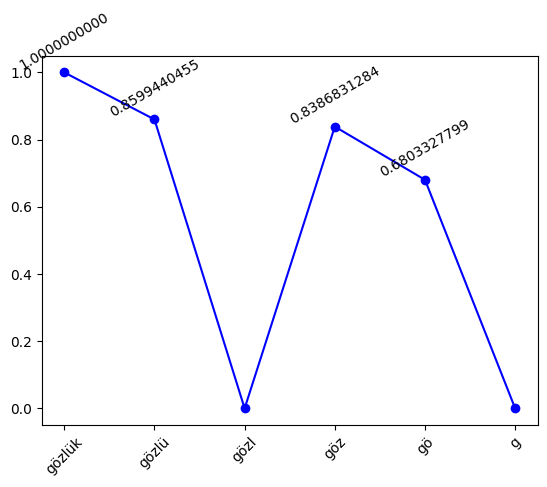

In [202]:
#test
test = root_dict('gözlük')
root_plot(test)

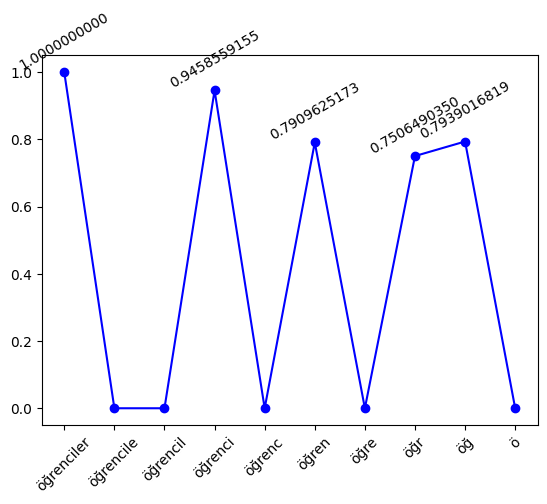

In [203]:
#test
test = root_dict('öğrenciler')
root_plot(test)

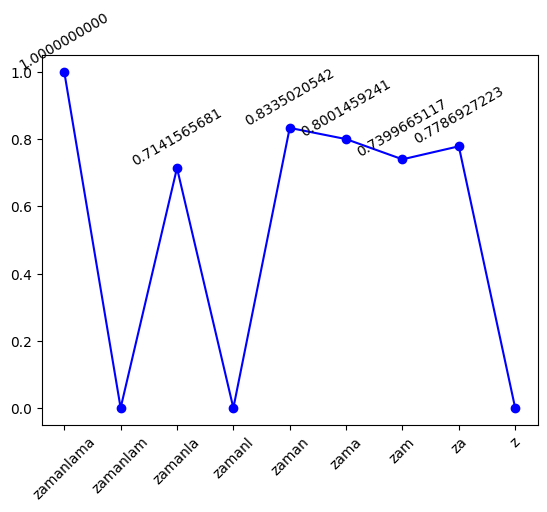

In [242]:
#test
test = root_dict('zamanlama')
root_plot(test)

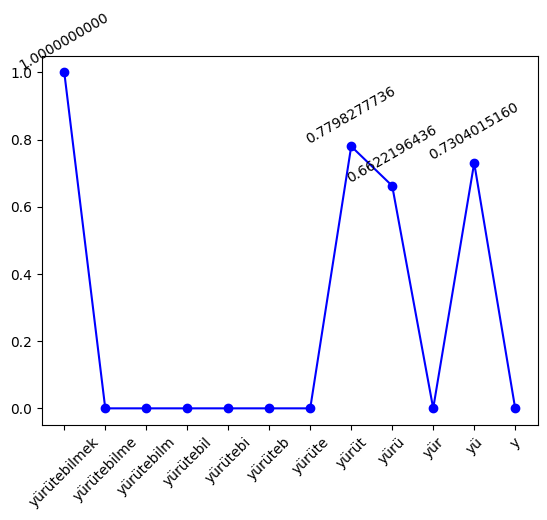

In [238]:
#test
test = root_dict('yürütebilmek')
root_plot(test)

In [204]:
turkish_words_grouped = {
    "kitap": ["kitapçı", "kitaplık", "kitapsız"],
    "bil": ["bilmek","bilgin","bilgi", "bilgisayar", "bilgili", "bilgisiz"],
    "telefon": ["telefoncu"],
    "yaz": ["yazmak","yazı", "yazılım", "yazıcı", "yazılı"],
    "uç": ["uçmak", "uçuş", "uçak"],
    "bisiklet": ["bisikletçi"],
    "göz": ["gözlük", "gözlem", "gözyaşı"],
    "su": ["sulu", "susuz"],
    "suç" : ["suçlu"],
    "yol": ["yollar", "yolcu", "yolsuz", "yolluk"],
    "el": ["eller"],
    "zaman": ["zamanlı", "zamansız", "zamanla"],
    "sev": ["sevgili", "sevgisiz", "sevgi", "sevmek"],
    "gör": ["görmek", "görüş", "görünüm", "görgü", "görgüsüz"],
    "dinle": ["dinlemek", "dinleyici"],
    "çalış": ["çalışmak", "çalışan", "çalışma"],
    "öğren": ["öğren", "öğrenci", "öğretmen", "öğrenme"],
    "koş": ["koşu", "koşmak", "koşucu", "koşma"],
    "yüz": ["yüzmek", "yüzücü", "yüzme"],
    "oyna": ["oynamak", "oyuncu", "oyun"],
    "düş": ["düşün", "düşünce", "düşünmek", "düşünür"],
    "gül": ["gülmek", "gülüş"],
    "ağla": [ "ağlamak", "ağlayan", "ağlama"],
    "sor": [ "sormak", "soru", "sorgu"],
    "cevap": [ "cevaplamak", "cevaplı", "cevapsız"],
    "bak": [ "bakmak", "bakış", "bakıcı"],
    "yap": [ "yapmak", "yapıcı", "yapılış", "yapı"],
    "git": [ "gitmek", "gidiş", "giden"],
    "gel": ["gel", "gelmek", "geliş", "gelir"],
    "kalk": [ "kalkmak", "kalkan", "kalkış"],
    "otur": [ "oturmak", "oturan", "oturma"],
    "yürü": ["yürümek", "yürüyüş", "yürüyen"],
    "söyle": [ "söylemek", "söylem", "söyleyiş"],
    "oku": [ "okumak", "okur", "okuma", "okul"],
    "seç": ["seç", "seçmek", "seçim", "seçilmiş"],
    "baş": ["başla", "başlamak", "başlangıç", "başlayan"],
    "bit": ["bitir", "bitirmek", "bitiş", "bitmiş", "bitmek"],
    "bul": ["bul", "bulmak", "bulgu", "bulan"],
    "kayıp": ["kaybet", "kaybetmek", "kaybol", "kaybolma"],
    "sat": ["satmak", "satıcı", "satış"],
    "al": ["almak", "alıcı", "alış"],
    "ver": ["vermek", "veriş", "veren"],
    "çık": [ "çıkmak", "çıkış", "çıkan"],
    "gir": [ "girmek", "giriş", "giren"],
    "kır": [ "kırmak", "kırık", "kıran"],
    "ara": ["aramak", "arama", "arayıcı","arayış"]
}

In [205]:
average_similarities = {}

for root, words in turkish_words_grouped.items():
    similarities_ = []
    for word in words:
        similarity_dict = root_dict(word)
        if root in similarity_dict:
            similarities_.extend([v for k, v in similarity_dict.items() if k == root])
    if similarities_:
        average_similarities[root] = np.mean(similarities_)

for root, avg_similarity in average_similarities.items():
    print(f"Root: {root}, Average Similarity: {avg_similarity}")

Root: kitap, Average Similarity: 0.8613917231559753
Root: bil, Average Similarity: 0.7743305563926697
Root: telefon, Average Similarity: 0.6817338466644287
Root: yaz, Average Similarity: 0.571206271648407
Root: uç, Average Similarity: 0.7284294962882996
Root: bisiklet, Average Similarity: 0.819299578666687
Root: göz, Average Similarity: 0.8387174606323242
Root: su, Average Similarity: 0.8263345956802368
Root: suç, Average Similarity: 0.8590255975723267
Root: yol, Average Similarity: 0.7426787614822388
Root: el, Average Similarity: 0.7435184717178345
Root: zaman, Average Similarity: 0.7689720988273621
Root: sev, Average Similarity: 0.8079009652137756
Root: gör, Average Similarity: 0.7337150573730469
Root: dinle, Average Similarity: 0.7977300882339478
Root: çalış, Average Similarity: 0.685045063495636
Root: öğren, Average Similarity: 0.8870031237602234
Root: koş, Average Similarity: 0.7521587014198303
Root: yüz, Average Similarity: 0.7245293259620667
Root: oyna, Average Similarity: 0.750

In [206]:
# overall avarage similarity
overall_avg_similarity = np.mean(list(average_similarities.values()))
print(f"Overall Average Similarity: {overall_avg_similarity}")

Overall Average Similarity: 0.7673585414886475


In [239]:
def root_threshold(word_dict, threshold):
    root_found, root_value = None, None
    for key, value in word_dict.items():
        if value != 0:
            if value >= threshold:
                root_found = key
                root_value = value
            else:
                return root_found, root_value

In [240]:
with open('turkce_kelime_listesi.txt', 'r') as f:
    word_list = []
    for line in f:
        try:
            word_vectors.get_vector(line.strip())
            word_list.append(line.strip())
        except:
            pass
print(word_list)

['ab', 'aba', 'abacı', 'abadi', 'abajur', 'abaküs', 'abalı', 'abanoz', 'abanozgiller', 'abartı', 'abartılı', 'abartısız', 'abartma', 'abartmak', 'abartmalı', 'abat', 'abdal', 'abdallık', 'abdest', 'abdesthane', 'abdestlik', 'abe', 'abece', 'abecesel', 'aberasyon', 'abes', 'abide', 'abidevi', 'abis', 'abiye', 'abla', 'ablak', 'ablatif', 'abluka', 'abone', 'abonelik', 'abra', 'abrakadabra', 'absent', 'absorbe', 'abstre', 'absürt', 'abu', 'abuk', 'abuli', 'abus', 'acaba', 'acar', 'acayip', 'acele', 'aceleci', 'acelecilik', 'acem', 'acemaşiran', 'acemi', 'acemice', 'acemilik', 'acemkürdi', 'acente', 'acentelik', 'acep', 'aceze', 'acı', 'acıklı', 'acıkma', 'acılı', 'acılık', 'acıma', 'acımak', 'acımasız', 'acımasızca', 'acımasızlık', 'acımsı', 'acımtırak', 'acısız', 'acibe', 'acil', 'acilen', 'aciliyet', 'aciz', 'âciz', 'acun', 'acur', 'acuze', 'aç', 'açabilme', 'açabilmek', 'açacak', 'açan', 'açar', 'açelya', 'açgözlü', 'açgözlülük', 'açı', 'açık', 'açıkça', 'açıkçası', 'açıkgöz', 'açıklam

In [241]:
for word in word_list:
    try:
        word_dict = root_dict(word)
        root, value = root_threshold(word_dict, overall_avg_similarity)
        print(f'Root found for {word} is {root} with {value} similarity')
    except Exception as e:
        print(e)

cannot unpack non-iterable NoneType object
Root found for aba is aba with 1.0000001192092896 similarity
Root found for abacı is abacı with 1.0000001192092896 similarity
Root found for abadi is abad with 0.7987271547317505 similarity
Root found for abajur is aba with 0.8080757260322571 similarity
Root found for abaküs is abaküs with 1.0 similarity
Root found for abalı is aba with 0.8398541808128357 similarity
Root found for abanoz is aba with 0.788147509098053 similarity
cannot unpack non-iterable NoneType object
Root found for abartı is abar with 0.8710206747055054 similarity
Root found for abartılı is abar with 0.7867225408554077 similarity
Root found for abartısız is abar with 0.8218855261802673 similarity
Root found for abartma is abar with 0.851105272769928 similarity
cannot unpack non-iterable NoneType object
Root found for abartmalı is abar with 0.8641278147697449 similarity
Root found for abat is abat with 1.0 similarity
Root found for abdal is abda with 0.8112529516220093 simil